In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-employee-attrition/HR-Employee-Attrition.csv


# predicting employee attrition

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/hr-employee-attrition/HR-Employee-Attrition.csv')
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [4]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.shape

(1470, 35)

In [6]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df['EmployeeNumber']

0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: EmployeeNumber, Length: 1470, dtype: int64

In [9]:
df['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

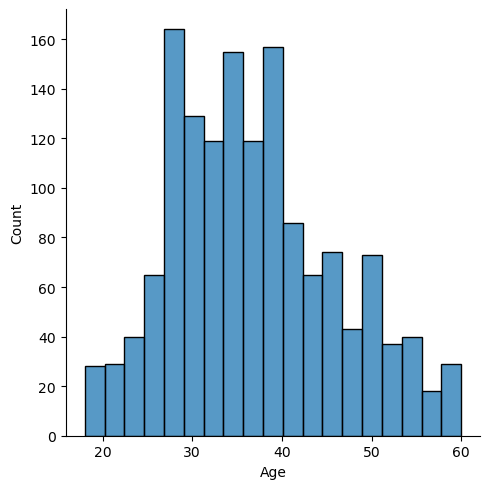

In [10]:
sns.displot(data=df,x='Age')

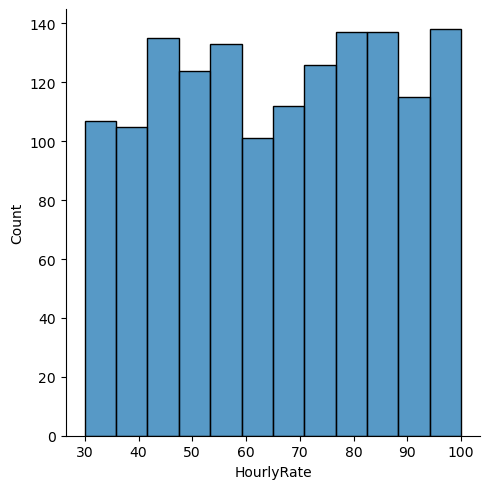

In [11]:
sns.displot(data=df,x='HourlyRate')

<AxesSubplot:xlabel='Attrition', ylabel='count'>

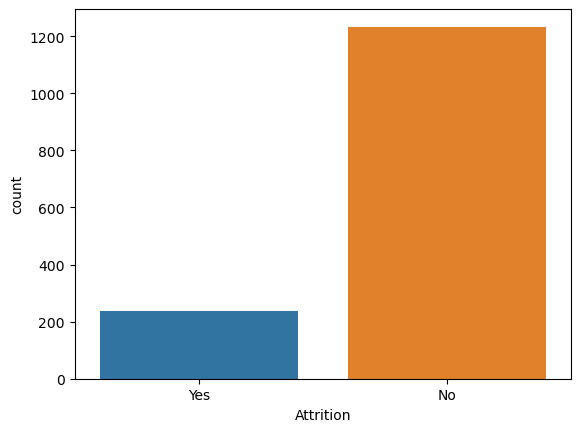

In [12]:
sns.countplot(data=df,x='Attrition')

<AxesSubplot:xlabel='Age', ylabel='count'>

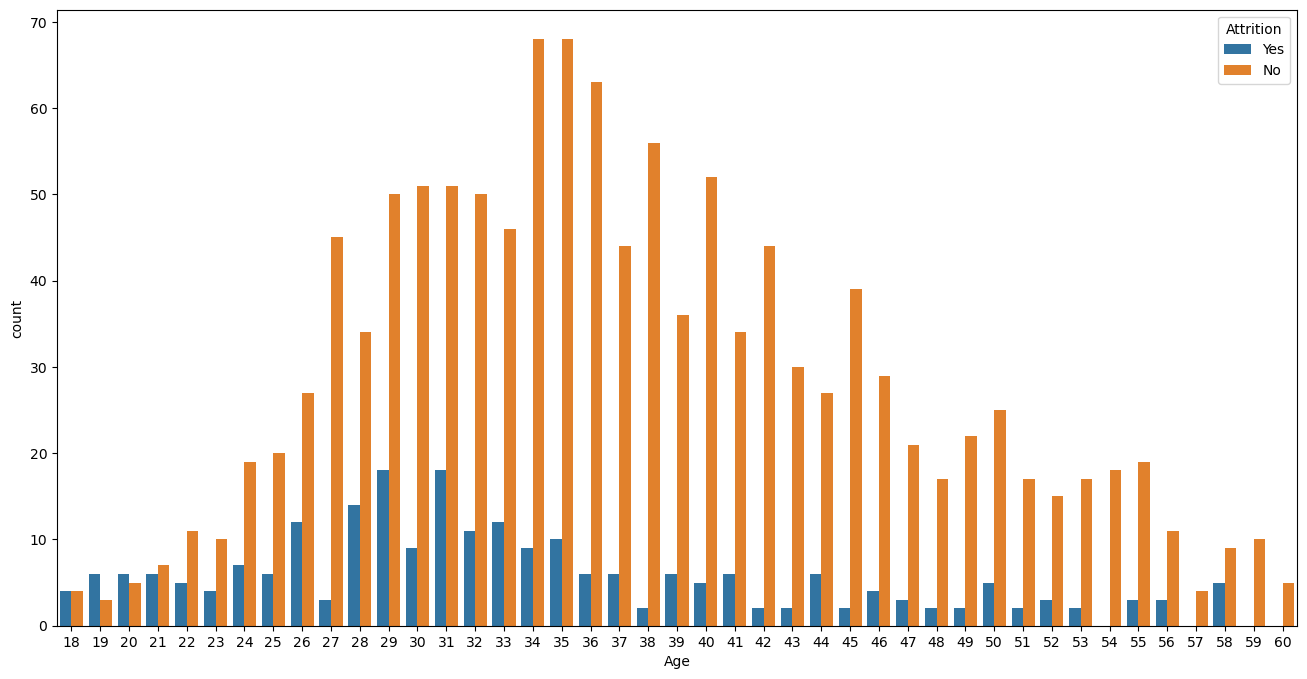

In [13]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,x='Age',hue='Attrition')

<AxesSubplot:xlabel='Department', ylabel='count'>

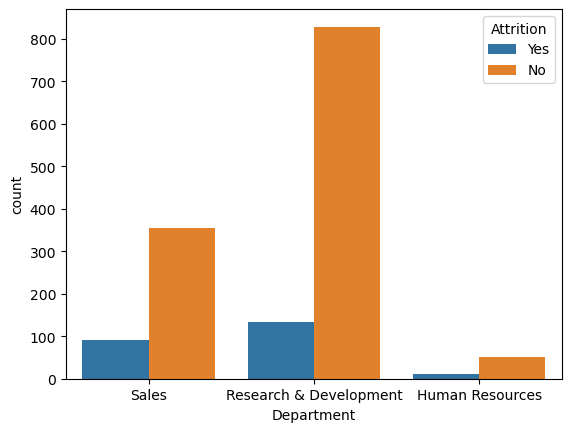

In [14]:
sns.countplot(data=df,x='Department',hue='Attrition')

# print all data unique values

In [15]:
for column in df.columns:
    if df[column].dtype==object:
        print(str(column) + ' : '+ (str(df[column].unique())))
        print(df[column].value_counts())
        print('________________________________________________')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
________________________________________________
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype:

In [16]:
df.sample(3)

Age Attrition BusinessTravel  DailyRate              Department  \
244    45        No  Travel_Rarely        252  Research & Development   
1053   57        No  Travel_Rarely        405  Research & Development   
754    33        No     Non-Travel       1038                   Sales   

      DistanceFromHome  Education EducationField  EmployeeCount  \
244                  1          3          Other              1   
1053                 1          2  Life Sciences              1   
754                  8          1  Life Sciences              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
244              336  ...                         3            80   
1053            1483  ...                         1            80   
754             1044  ...                         4            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
244                  1                 25                      2   
1053                 1                 13                      2   
754                  0                  3                      2   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
244                3              24                  0   
1053               2              12                  9   
754                2               2                  2   

      YearsSinceLastPromotion  YearsWithCurrManager  
244                         1                     7  
1053                        2                     8  
754                         2                     2  

[3 rows x 35 columns]

In [17]:
df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1,inplace=True)

In [18]:
df.shape

(1470, 31)

In [19]:
df['Attrition']=df['Attrition'].replace({'Yes':1, 'No':0})

In [20]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

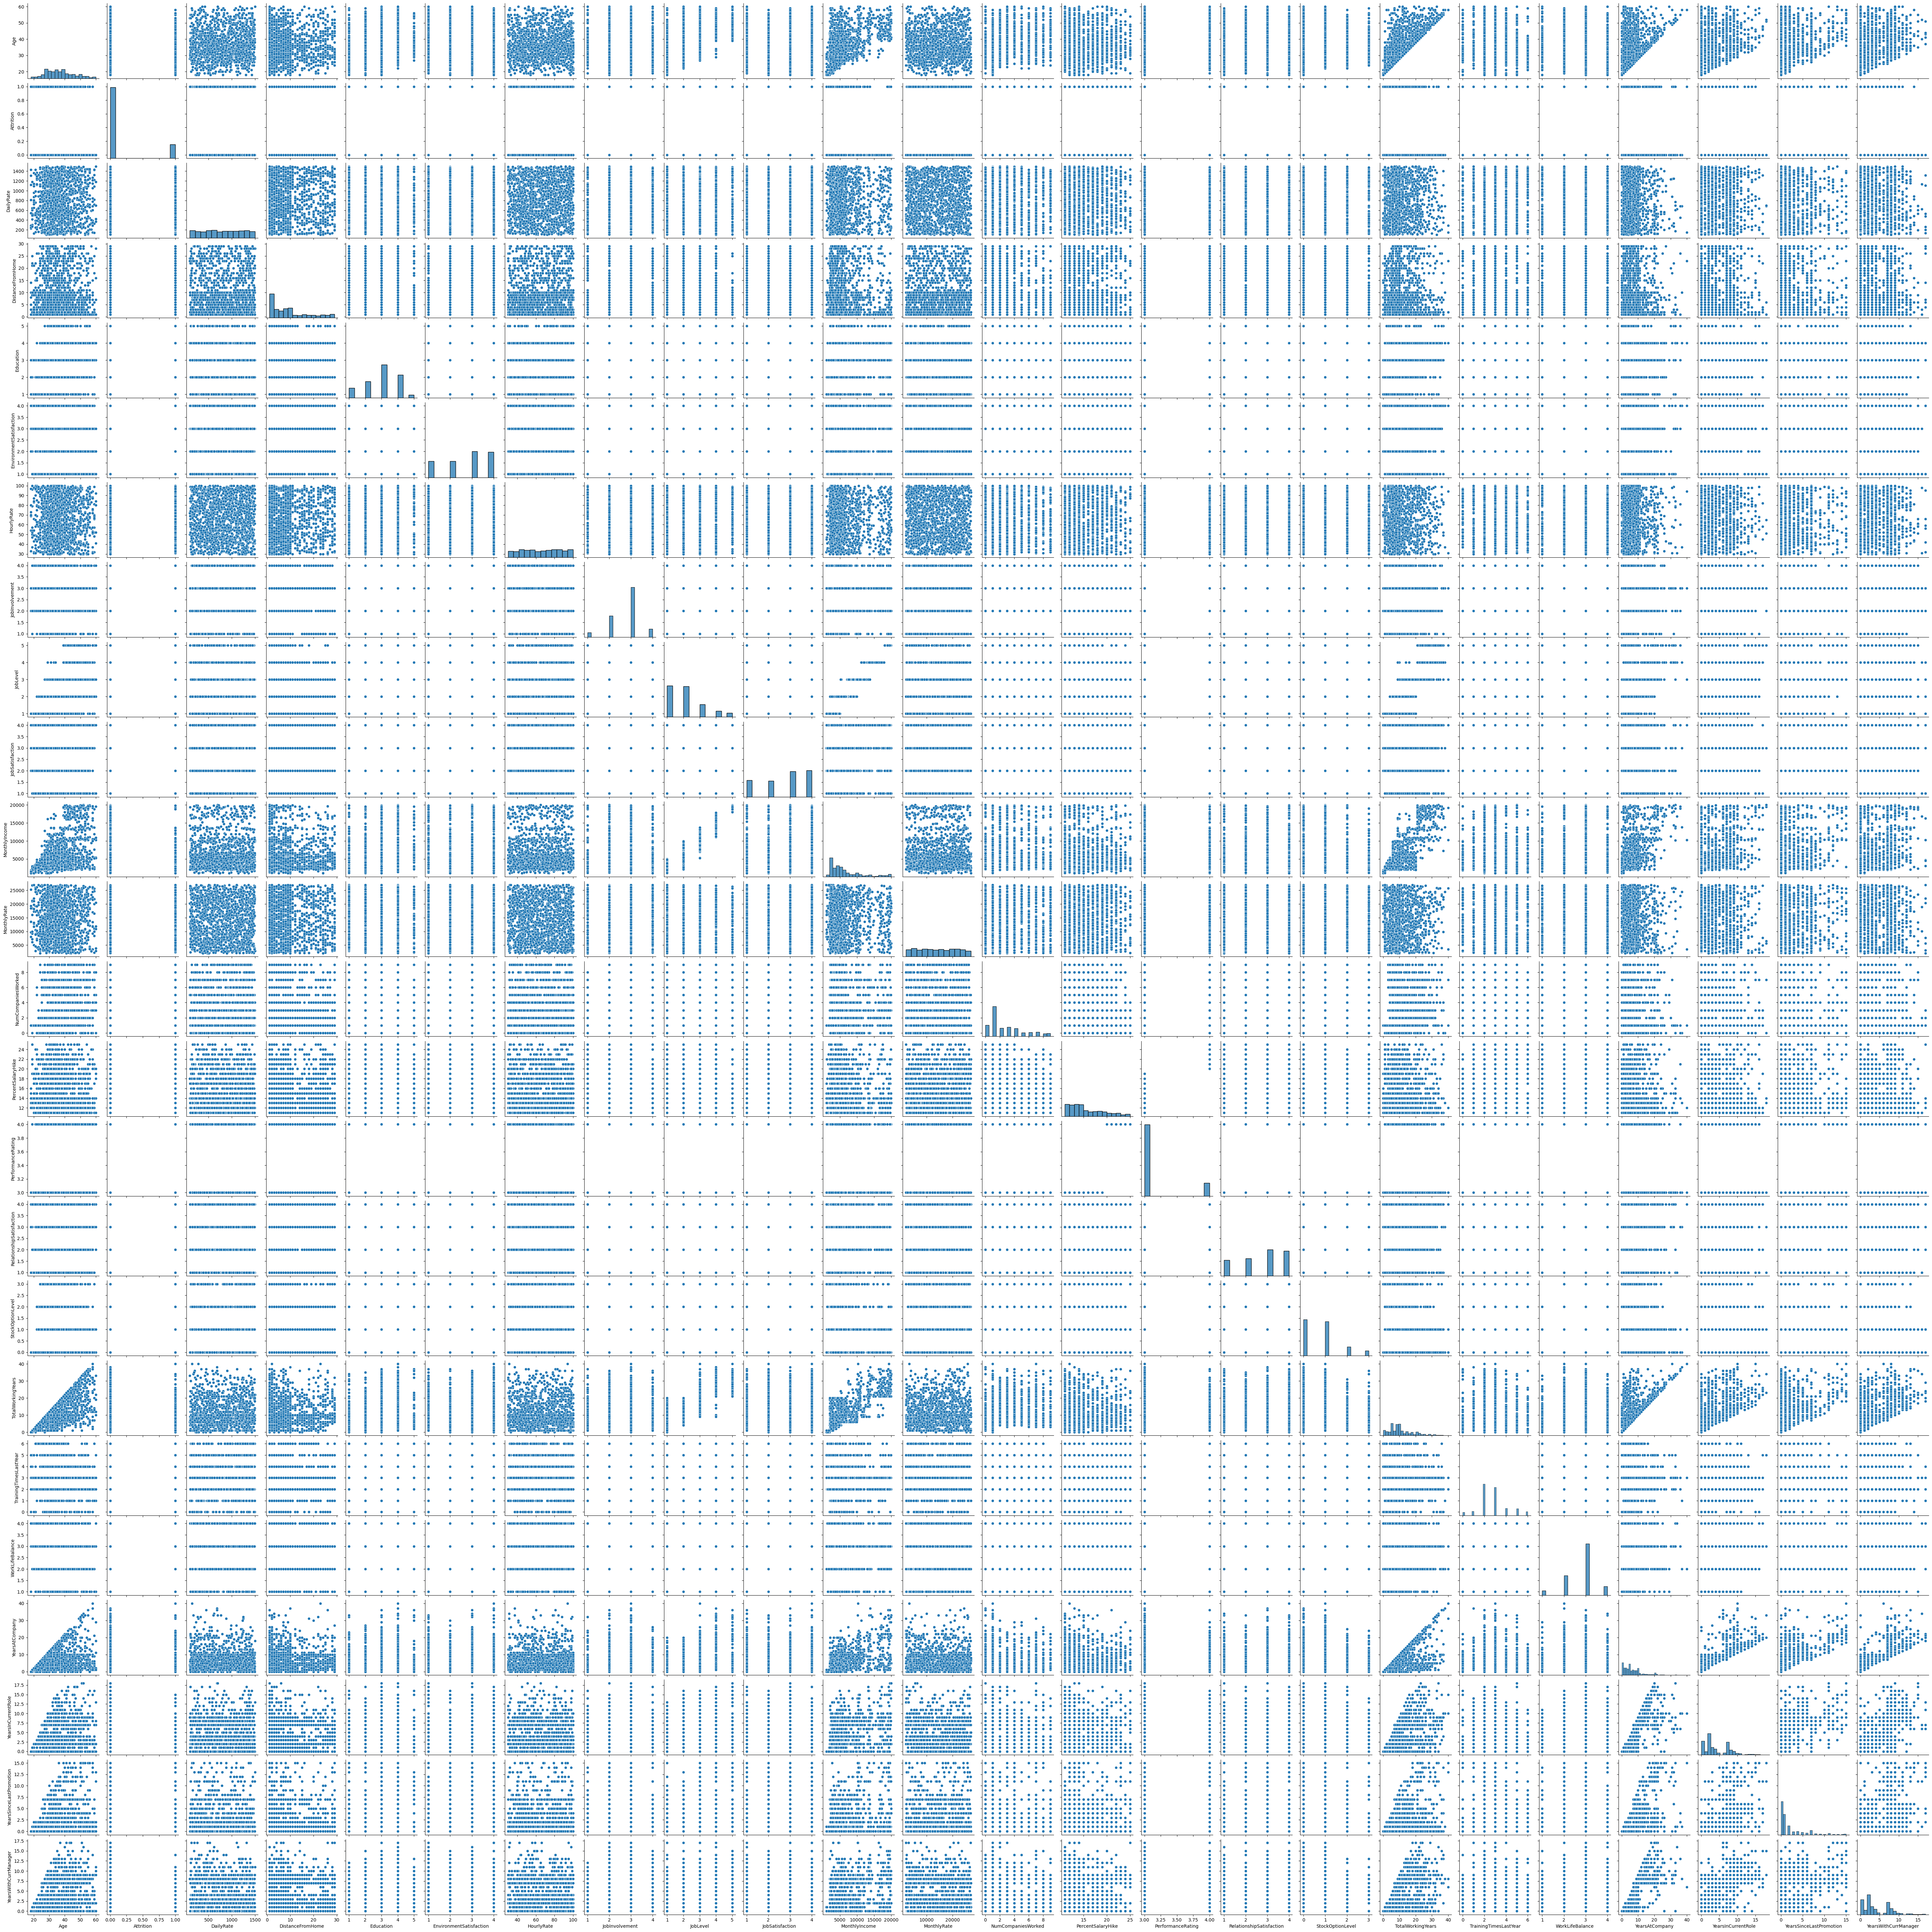

In [21]:
sns.pairplot(df)

# exploring correlations between data

In [22]:
df.corr()

Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000  -0.159205   0.010661         -0.001686   
Attrition                -0.159205   1.000000  -0.056652          0.077924   
DailyRate                 0.010661  -0.056652   1.000000         -0.004985   
DistanceFromHome         -0.001686   0.077924  -0.004985          1.000000   
Education                 0.208034  -0.031373  -0.016806          0.021042   
EnvironmentSatisfaction   0.010146  -0.103369   0.018355         -0.016075   
HourlyRate                0.024287  -0.006846   0.023381          0.031131   
JobInvolvement            0.029820  -0.130016   0.046135          0.008783   
JobLevel                  0.509604  -0.169105   0.002966          0.005303   
JobSatisfaction          -0.004892  -0.103481   0.030571         -0.003669   
MonthlyIncome             0.497855  -0.159840   0.007707         -0.017014   
MonthlyRate               0.028051   0.015170  -0.032182          0.027473   
NumCompaniesWorked        0.299635   0.043494   0.038153         -0.029251   
PercentSalaryHike         0.003634  -0.013478   0.022704          0.040235   
PerformanceRating         0.001904   0.002889   0.000473          0.027110   
RelationshipSatisfaction  0.053535  -0.045872   0.007846          0.006557   
StockOptionLevel          0.037510  -0.137145   0.042143          0.044872   
TotalWorkingYears         0.680381  -0.171063   0.014515          0.004628   
TrainingTimesLastYear    -0.019621  -0.059478   0.002453         -0.036942   
WorkLifeBalance          -0.021490  -0.063939  -0.037848         -0.026556   
YearsAtCompany            0.311309  -0.134392  -0.034055          0.009508   
YearsInCurrentRole        0.212901  -0.160545   0.009932          0.018845   
YearsSinceLastPromotion   0.216513  -0.033019  -0.033229          0.010029   
YearsWithCurrManager      0.202089  -0.156199  -0.026363          0.014406   

                          Education  EnvironmentSatisfaction  HourlyRate  \
Age                        0.208034                 0.010146    0.024287   
Attrition                 -0.031373                -0.103369   -0.006846   
DailyRate                 -0.016806                 0.018355    0.023381   
DistanceFromHome           0.021042                -0.016075    0.031131   
Education                  1.000000                -0.027128    0.016775   
EnvironmentSatisfaction   -0.027128                 1.000000   -0.049857   
HourlyRate                 0.016775                -0.049857    1.000000   
JobInvolvement             0.042438                -0.008278    0.042861   
JobLevel                   0.101589                 0.001212   -0.027853   
JobSatisfaction           -0.011296                -0.006784   -0.071335   
MonthlyIncome              0.094961                -0.006259   -0.015794   
MonthlyRate               -0.026084                 0.037600   -0.015297   
NumCompaniesWorked         0.126317                 0.012594    0.022157   
PercentSalaryHike         -0.011111                -0.031701   -0.009062   
PerformanceRating         -0.024539                -0.029548   -0.002172   
RelationshipSatisfaction  -0.009118                 0.007665    0.001330   
StockOptionLevel           0.018422                 0.003432    0.050263   
TotalWorkingYears          0.148280                -0.002693   -0.002334   
TrainingTimesLastYear     -0.025100                -0.019359   -0.008548   
WorkLifeBalance            0.009819                 0.027627   -0.004607   
YearsAtCompany             0.069114                 0.001458   -0.019582   
YearsInCurrentRole         0.060236                 0.018007   -0.024106   
YearsSinceLastPromotion    0.054254                 0.016194   -0.026716   
YearsWithCurrManager       0.069065                -0.004999   -0.020123   

                          JobInvolvement  JobLevel  JobSatisfaction  ...  \
Age                             0.029820  0.509604        -0.004892  ...   
Attrition                  

<AxesSubplot:>

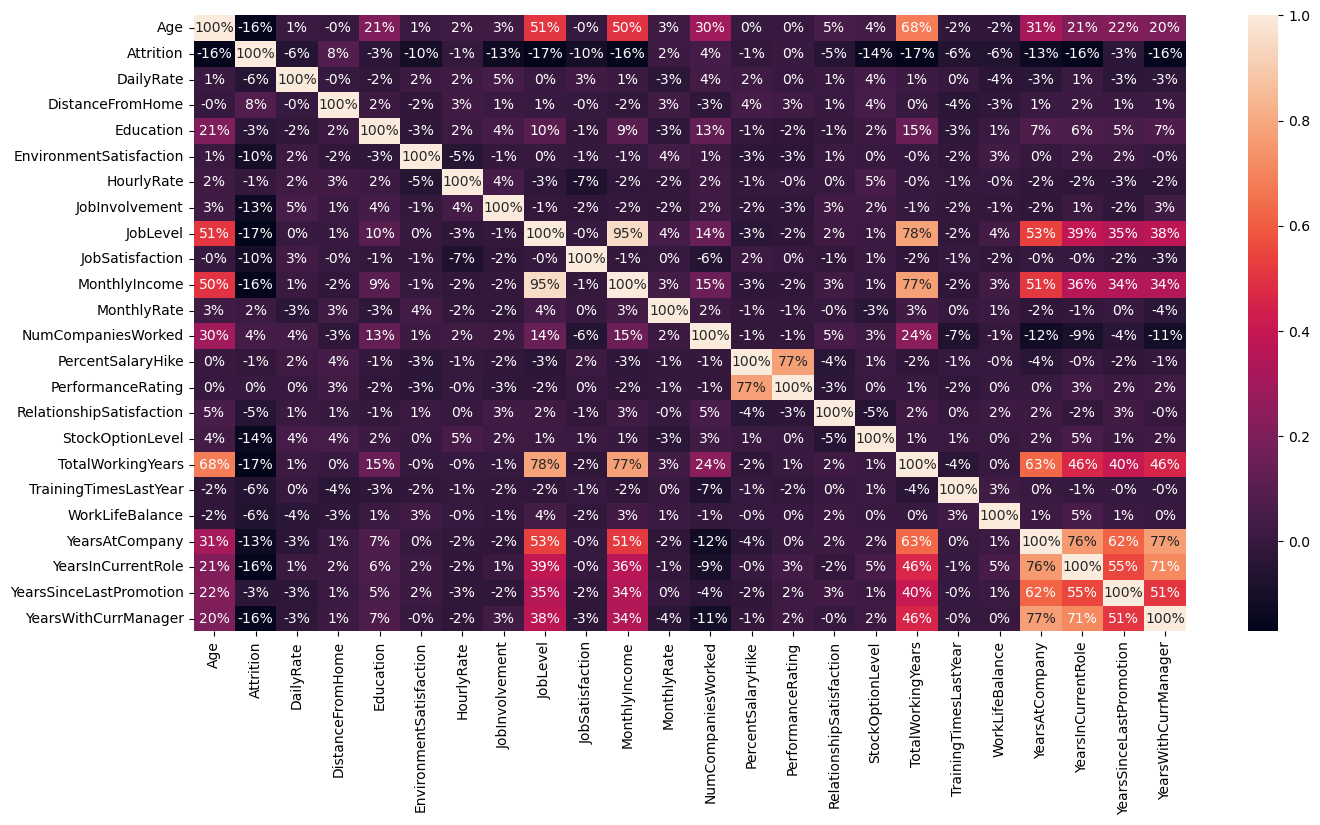

In [23]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

# converting non numerical data to numerical data

In [24]:
df=pd.get_dummies(df)

In [25]:
df

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0      41          1       1102                 1          2   
1      49          0        279                 8          1   
2      37          1       1373                 2          2   
3      33          0       1392                 3          4   
4      27          0        591                 2          1   
...   ...        ...        ...               ...        ...   
1465   36          0        884                23          2   
1466   39          0        613                 6          1   
1467   27          0        155                 4          3   
1468   49          0       1023                 2          3   
1469   34          0        628                 8          3   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                           2          94               3         2   
1                           3          61               2         2   
2                           4          92               2         1   
3                           4          56               3         1   
4                           1          40               3         1   
...                       ...         ...             ...       ...   
1465                        3          41               4         2   
1466                        4          42               2         3   
1467                        2          87               4         2   
1468                        4          63               2         2   
1469                        2          82               4         2   

      JobSatisfaction  ...  JobRole_Manufacturing Director  \
0                   4  ...                               0   
1                   2  ...                               0   
2                   3  ...                               0   
3                   3  ...                               0   
4                   2  ...                               0   
...               ...  ...                             ...   
1465                4  ...                               0   
1466                1  ...                               0   
1467                2  ...                               1   
1468                2  ...                               0   
1469                3  ...                               0   

      JobRole_Research Director  JobRole_Research Scientist  \
0                             0                           0   
1                             0                           1   
2                             0                           0   
3                             0                           1   
4                             0                           0   
...                         ...                         ...   
1465                          0                           0   
1466                          0                           0   
1467                          0                           0   
1468                          0                           0   
1469                          0                           0   

      JobRole_Sales Executive  JobRole_Sales Representative  \
0                           1                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   
...                       ...                           ...   
1465                        0                             0   
1466                        0                             0   
1467                        0                             0   
1468                        1                             0   
1469                        0                             0   

      MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                          0                    

# scaling the data

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(df)

array([[0.54761905, 1.        , 0.71581961, ..., 1.        , 0.        ,
        1.        ],
       [0.73809524, 0.        , 0.12670007, ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 1.        , 0.90980673, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.21428571, 0.        , 0.03793844, ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.        , 0.65926986, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.        , 0.37652112, ..., 0.        , 1.        ,
        0.        ]])

# split the data

In [27]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [37]:
print(x_train.shape)
print(x_test.shape)

(1102, 51)
(368, 51)


# using random forest classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=500,criterion="gini")
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [59]:
model.score(x_train,y_train)

1.0

# model's accuracy by classification report

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=model.predict(x_test)
print(confusion_matrix(y_pred,y_test))

[[317  44]
 [  3   4]]


In [61]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       361
           1       0.08      0.57      0.15         7

    accuracy                           0.87       368
   macro avg       0.54      0.72      0.54       368
weighted avg       0.97      0.87      0.92       368



              precision    recall  f1-score   support

           0       0.99      0.88      0.93       361
           1       0.08      0.57      0.15         7

    accuracy                           0.87       368
   macro avg       0.54      0.72      0.54       368
weighted avg       0.97      0.87      0.92       368



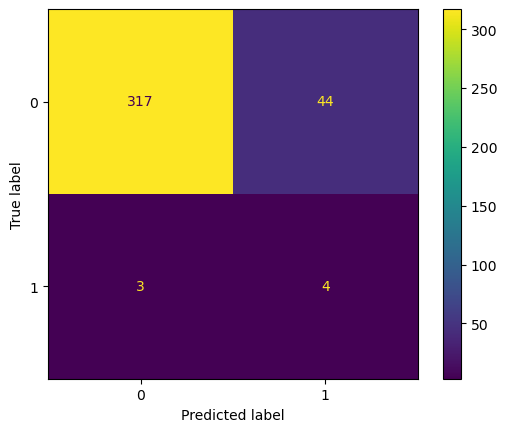

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test))
disp=disp.plot()
print(classification_report(y_pred,y_test))

# using logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [68]:
lr.score(x_train,y_train)

0.8366606170598911

In [69]:
pred=lr.predict(x_test)
print(confusion_matrix(pred,y_test))

[[320  47]
 [  0   1]]


In [70]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       367
           1       0.02      1.00      0.04         1

    accuracy                           0.87       368
   macro avg       0.51      0.94      0.49       368
weighted avg       1.00      0.87      0.93       368



              precision    recall  f1-score   support

           0       1.00      0.87      0.93       367
           1       0.02      1.00      0.04         1

    accuracy                           0.87       368
   macro avg       0.51      0.94      0.49       368
weighted avg       1.00      0.87      0.93       368



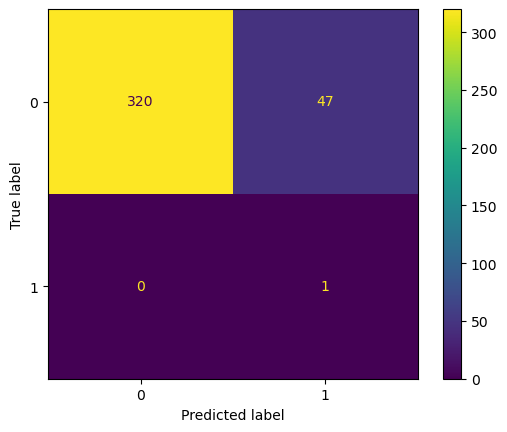

In [71]:
disp=ConfusionMatrixDisplay(confusion_matrix(pred,y_test))
disp=disp.plot()
print(classification_report(pred,y_test))

# using XGboosting

In [76]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=200,learning_rate=.001)
xgb.fit(x_train,y_train)
prediction=xgb.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,classification_report,plot_confusion_matrix
accuracy_score(prediction,y_test)
roc_auc_score(prediction,y_test)
print('XGB model,s accuracy is'+str(accuracy_score(prediction,y_test)))
print('XGB model,s accuracy is'+str(roc_auc_score(prediction,y_test)))

XGB model,s accuracy is0.8641304347826086
XGB model,s accuracy is0.6723594324750394


              precision    recall  f1-score   support

           0       0.96      0.89      0.92       346
           1       0.21      0.45      0.29        22

    accuracy                           0.86       368
   macro avg       0.59      0.67      0.61       368
weighted avg       0.92      0.86      0.89       368



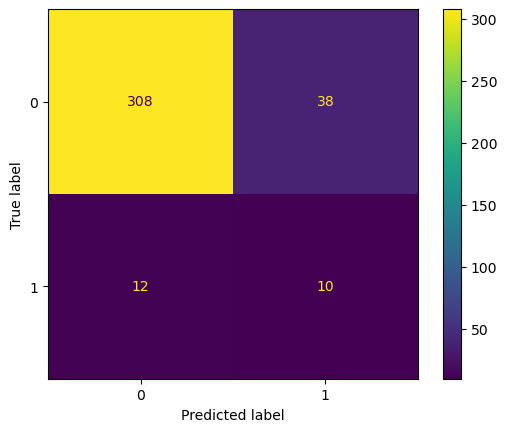

In [78]:
disp=ConfusionMatrixDisplay(confusion_matrix(prediction,y_test))
disp=disp.plot()
print(classification_report(prediction,y_test))

# comparing between prediction and true data

In [81]:
print(prediction[:30])
print()
print(y_test[:30])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]

1041    0
184     0
1222    1
67      0
220     0
494     0
430     0
240     0
218     0
49      0
665     0
926     0
617     0
361     0
1423    0
1244    0
1250    0
752     1
271     1
1055    0
259     1
428     0
1026    0
277     0
1105    0
1116    0
670     0
619     0
1046    0
247     0
Name: Attrition, dtype: int64
